In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib
import matplotlib.pyplot as plt

def set_pandas_display_options(max_rows=50, max_columns=50):
    """
    Sets the pandas display options for showing the number of rows and columns.
    
    Parameters:
    max_rows (int): The maximum number of rows to display in the DataFrame.
    max_columns (int): The maximum number of columns to display in the DataFrame.
    """
    pd.set_option('display.max_rows', max_rows)
    pd.set_option('display.max_columns', max_columns)

def suppress_warnings():
    """
    Suppresses warnings to avoid clutter in the output.
    """
    warnings.filterwarnings('ignore')

def initialize_plotting():
    """
    Initializes matplotlib and seaborn settings for better visualizations.
    """
    sns.set(style="whitegrid")
    matplotlib.rcParams['figure.figsize'] = (10, 6)

# Example of calling the functions
set_pandas_display_options()
suppress_warnings()
initialize_plotting()

In [4]:
import pandas as pd

# CSV-Dateien laden (achte darauf, den richtigen Pfad zu verwenden)
df1 = pd.read_csv(r"C:\Users\eev\Documents\Udacity\cardcosts\data\cards.csv", dtype={"uuid": str})
df2 = pd.read_csv(r"C:\Users\eev\Documents\Udacity\cardcosts\data\cardPrices.csv", dtype={"uuid": str})

# Sicherstellen, dass uuid keine Leerzeichen enthält
df1["uuid"] = df1["uuid"].str.strip()
df2["uuid"] = df2["uuid"].str.strip()

# Left Join auf "uuid"
merged_df = df2.merge(df1, on="uuid", how="left")

# Ergebnis anzeigen
merged_df.head(5)

,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing,uuid,artist,artistIds,asciiName,attractionLights,availability,boosterTypes,borderColor,cardParts,colorIdentity,colorIndicator,colors,defense,duelDeck,edhrecRank,edhrecSaltiness,faceConvertedManaCost,faceFlavorName,...,originalPrintings,originalReleaseDate,originalText,originalType,otherFaceIds,power,printings,promoTypes,rarity,rebalancedPrintings,relatedCards,securityStamp,setCode,side,signature,sourceProducts,subsets,subtypes,supertypes,text,toughness,type,types,variations,watermark
0,normal,USD,2025-03-28,mtgo,0.27,cardhoarder,retail,f182e364-0439-5594-a6e6-75f7889ccf45,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Whenever you cast a creature spell, you may pa...",Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,"Whenever you cast a creature spell, you may pa...",NaN,Vanguard,Vanguard,NaN,NaN
1,normal,USD,2025-03-28,mtgo,0.53,cardhoarder,retail,330deaa3-dd7a-52a8-bfbc-b323cd16a409,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Whenever a creature you control is put into a ...,Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,"Whenever a creature you control dies, target o...",NaN,Vanguard,Vanguard,NaN,NaN
2,normal,USD,2025-03-28,mtgo,0.02,cardhoarder,retail,79e36956-b91f-580f-8309-7d9585a67560,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Whenever a nontoken creature enters the battle...,Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,Whenever a nontoken creature you control enter...,NaN,Vanguard,Vanguard,NaN,NaN
3,normal,USD,2025-03-28,mtgo,0.29,cardhoarder,retail,6afb2b4c-530a-57d5-8e7f-871239f6fa05,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Pay 1 life: Until end of turn, whenever a crea...",Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,"Pay 1 life: Until end of turn, whenever a crea...",NaN,Vanguard,Vanguard,NaN,NaN
4,normal,USD,2025-03-28,mtgo,0.02,cardhoarder,retail,b1fc2762-92aa-5a14-8509-a59cb611e376,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Whenever a creature enters the battlefield und...,Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,"Whenever a creature you control enters, it gai...",NaN,Vanguard,Vanguard,NaN,NaN


# 1 Business Understanding

What do i want, i need data for a website thats checking cards by name and asking for values like whatsd the cost, color, text, artist and more. <br>
This data is crucial for the Website project and i will need to get all of this information<br>
Luckily itrs contained in the csv files i got online<br>

# Question 1

How many Type of cards do exist and are they unique?
# Question 2

Does it matter when they came out? and are there any dupllicates?

# Question 3
Does the Rarity Type matter?

In [5]:
print(df1.columns.tolist())

['artist', 'artistIds', 'asciiName', 'attractionLights', 'availability', 'boosterTypes', 'borderColor', 'cardParts', 'colorIdentity', 'colorIndicator', 'colors', 'defense', 'duelDeck', 'edhrecRank', 'edhrecSaltiness', 'faceConvertedManaCost', 'faceFlavorName', 'faceManaValue', 'faceName', 'finishes', 'flavorName', 'flavorText', 'frameEffects', 'frameVersion', 'hand', 'hasAlternativeDeckLimit', 'hasContentWarning', 'hasFoil', 'hasNonFoil', 'isAlternative', 'isFullArt', 'isFunny', 'isGameChanger', 'isOnlineOnly', 'isOversized', 'isPromo', 'isRebalanced', 'isReprint', 'isReserved', 'isStarter', 'isStorySpotlight', 'isTextless', 'isTimeshifted', 'keywords', 'language', 'layout', 'leadershipSkills', 'life', 'loyalty', 'manaCost', 'manaValue', 'name', 'number', 'originalPrintings', 'originalReleaseDate', 'originalText', 'originalType', 'otherFaceIds', 'power', 'printings', 'promoTypes', 'rarity', 'rebalancedPrintings', 'relatedCards', 'securityStamp', 'setCode', 'side', 'signature', 'sourceP

In [6]:
print(df2.columns.tolist())

['cardFinish', 'currency', 'date', 'gameAvailability', 'price', 'priceProvider', 'providerListing', 'uuid']



# 2 Data Understanding

I will be needing following Infos for the Thesis: Price, Name, UUID, artist anything. <br> 
the most important thing first is to find something both data sets have so im able to merge them flawless


In [21]:
df1.head(5)
print(df1.describe())

         defense    edhrecRank  edhrecSaltiness  faceConvertedManaCost  \
count  55.000000  94605.000000     71370.000000            3929.000000   
mean    4.654545  10652.675059         0.366423               2.270807   
std     1.004032   8498.296085         0.354527               2.001391   
min     3.000000      1.000000         0.010000               0.000000   
25%     4.000000   2925.000000         0.120000               0.000000   
50%     4.000000   8969.000000         0.260000               2.000000   
75%     5.000000  17452.000000         0.480000               4.000000   
max     7.000000  28779.000000         3.120000              11.000000   

       faceManaValue        hand        life       manaValue  
count    3929.000000  119.000000  119.000000   102689.000000  
mean        2.270807    0.084034    1.084034       22.476064  
std         2.001391    1.211385    5.683130     4413.159887  
min         0.000000   -4.000000   -8.000000        0.000000  
25%         0.0000

In [22]:
df2.head(5)
print(df2.describe())

               price
count  596640.000000
mean        7.851745
std       213.647591
min         0.010000
25%         0.150000
50%         0.380000
75%         1.600000
max     65000.000000


In [25]:
print(df1.columns.tolist())


['artist', 'artistIds', 'asciiName', 'attractionLights', 'availability', 'boosterTypes', 'borderColor', 'cardParts', 'colorIdentity', 'colorIndicator', 'colors', 'defense', 'duelDeck', 'edhrecRank', 'edhrecSaltiness', 'faceConvertedManaCost', 'faceFlavorName', 'faceManaValue', 'faceName', 'finishes', 'flavorName', 'flavorText', 'frameEffects', 'frameVersion', 'hand', 'hasAlternativeDeckLimit', 'hasContentWarning', 'hasFoil', 'hasNonFoil', 'isAlternative', 'isFullArt', 'isFunny', 'isGameChanger', 'isOnlineOnly', 'isOversized', 'isPromo', 'isRebalanced', 'isReprint', 'isReserved', 'isStarter', 'isStorySpotlight', 'isTextless', 'isTimeshifted', 'keywords', 'language', 'layout', 'leadershipSkills', 'life', 'loyalty', 'manaCost', 'manaValue', 'name', 'number', 'originalPrintings', 'originalReleaseDate', 'originalText', 'originalType', 'otherFaceIds', 'power', 'printings', 'promoTypes', 'rarity', 'rebalancedPrintings', 'relatedCards', 'securityStamp', 'setCode', 'side', 'signature', 'sourceP

In [24]:
print(df2.columns.tolist())

['cardFinish', 'currency', 'date', 'gameAvailability', 'price', 'priceProvider', 'providerListing', 'uuid']


In [10]:
if "price" in merged_df.columns:
    print("Column 'price' exists in merged_df.")
else:
    print("Column 'price' does not exist in merged_df.")

Column 'price' exists in merged_df.


In [12]:
def get_dataframe_shape(merged_df):
    """
    Returns the shape of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame whose shape is to be queried.
    
    Returns:
    tuple: A tuple containing the number of rows and columns of the DataFrame.
    """
    return merged_df.shape

# Example: Calling the function to get the shape of the DataFrame
shape = get_dataframe_shape(merged_df)
print(f"Shape of DataFrame: {shape}")

Shape of DataFrame: (596640, 86)


In [32]:
def count_missing_and_existing_values(merged_df, columns):
    """
    Counts the missing and existing values for the specified columns in the DataFrame.
    i only check here for uuid to see if something happened in the merging process
    """
    missing_counts = merged_df[columns].isna().sum()
    existing_counts = merged_df[columns].notna().sum()
    
    return pd.DataFrame({'Missing Values': missing_counts, 'Existing Values': existing_counts})

# Example: Calling the function to get missing and existing counts for specific columns
columns_to_check = ['uuid']
missing_df = count_missing_and_existing_values(merged_df, columns_to_check)
print(missing_df)

      Missing Values  Existing Values
uuid               0           596640


I dont need to eliminate duplicates since there are none


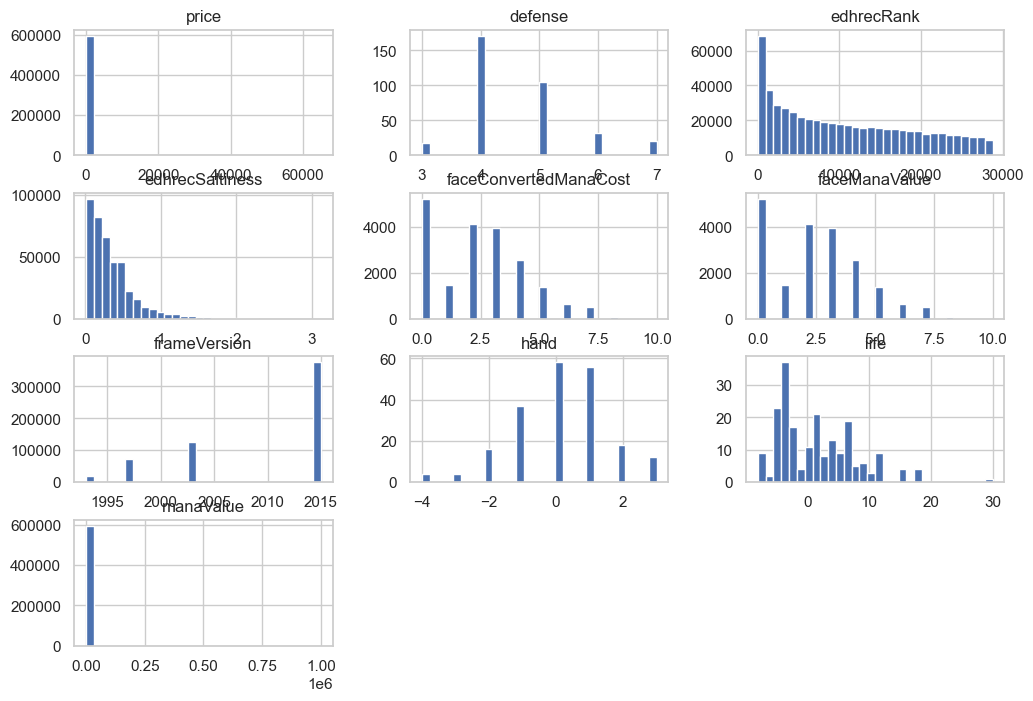

In [34]:
import matplotlib.pyplot as plt
merged_df.hist(figsize=(12, 8), bins=30)
plt.show()

In [13]:
merged_df.head(5)

,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing,uuid,artist,artistIds,asciiName,attractionLights,availability,boosterTypes,borderColor,cardParts,colorIdentity,colorIndicator,colors,defense,duelDeck,edhrecRank,edhrecSaltiness,faceConvertedManaCost,faceFlavorName,...,originalPrintings,originalReleaseDate,originalText,originalType,otherFaceIds,power,printings,promoTypes,rarity,rebalancedPrintings,relatedCards,securityStamp,setCode,side,signature,sourceProducts,subsets,subtypes,supertypes,text,toughness,type,types,variations,watermark
0,normal,USD,2025-03-28,mtgo,0.27,cardhoarder,retail,f182e364-0439-5594-a6e6-75f7889ccf45,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Whenever you cast a creature spell, you may pa...",Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,"Whenever you cast a creature spell, you may pa...",NaN,Vanguard,Vanguard,NaN,NaN
1,normal,USD,2025-03-28,mtgo,0.53,cardhoarder,retail,330deaa3-dd7a-52a8-bfbc-b323cd16a409,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Whenever a creature you control is put into a ...,Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,"Whenever a creature you control dies, target o...",NaN,Vanguard,Vanguard,NaN,NaN
2,normal,USD,2025-03-28,mtgo,0.02,cardhoarder,retail,79e36956-b91f-580f-8309-7d9585a67560,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Whenever a nontoken creature enters the battle...,Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,Whenever a nontoken creature you control enter...,NaN,Vanguard,Vanguard,NaN,NaN
3,normal,USD,2025-03-28,mtgo,0.29,cardhoarder,retail,6afb2b4c-530a-57d5-8e7f-871239f6fa05,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Pay 1 life: Until end of turn, whenever a crea...",Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,"Pay 1 life: Until end of turn, whenever a crea...",NaN,Vanguard,Vanguard,NaN,NaN
4,normal,USD,2025-03-28,mtgo,0.02,cardhoarder,retail,b1fc2762-92aa-5a14-8509-a59cb611e376,UDON,1aa5b0cc-259b-40f0-b236-6866876b917a,NaN,NaN,mtgo,NaN,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Whenever a creature enters the battlefield und...,Vanguard,NaN,NaN,PMOA,NaN,rare,NaN,NaN,NaN,PMOA,NaN,NaN,NaN,NaN,NaN,NaN,"Whenever a creature you control enters, it gai...",NaN,Vanguard,Vanguard,NaN,NaN



# 3 Data Preparation

Now i got a bit more of a understanding for the Data im checking for i definetely need to remove missing values or check remove errors from the merging, <br>
ive already checked it i nthe data understanding part right above and see no missing values so i only check for duplicates 
sinced the data set is from a profesasional source its flawless so far

In [35]:
print(merged_df.duplicated().sum())

0


# 4. Modeling

The data is prepared, i now need some insights i can share on the data, for example is the price dempendantr on color, are there more cards of type a then there is of type b and more. <br>
i will gain some basic insights this way


## Question 1
How many type of cards do exist and are they unique

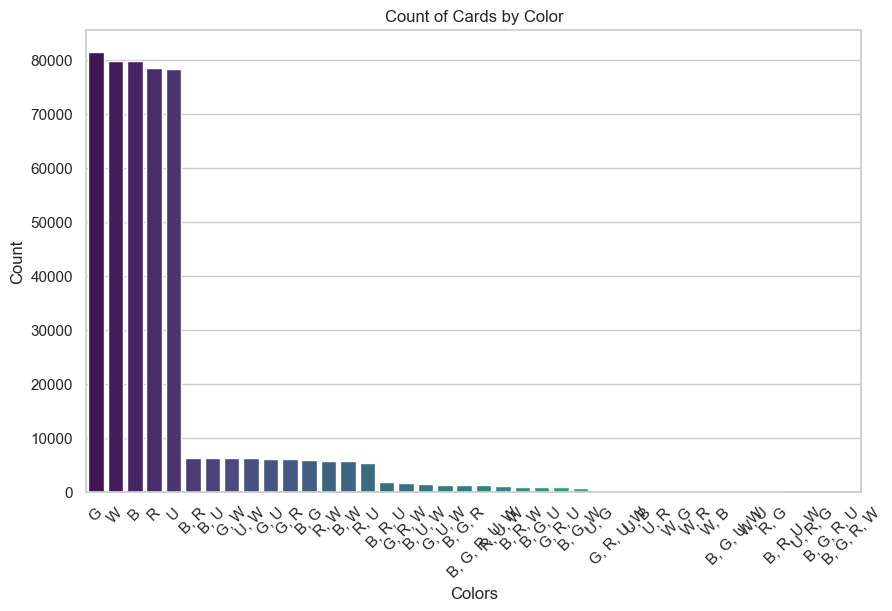

In [14]:
color_counts = merged_df["colors"].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette="viridis")

# Customize plot
plt.xlabel("Colors")
plt.ylabel("Count")
plt.title("Count of Cards by Color")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

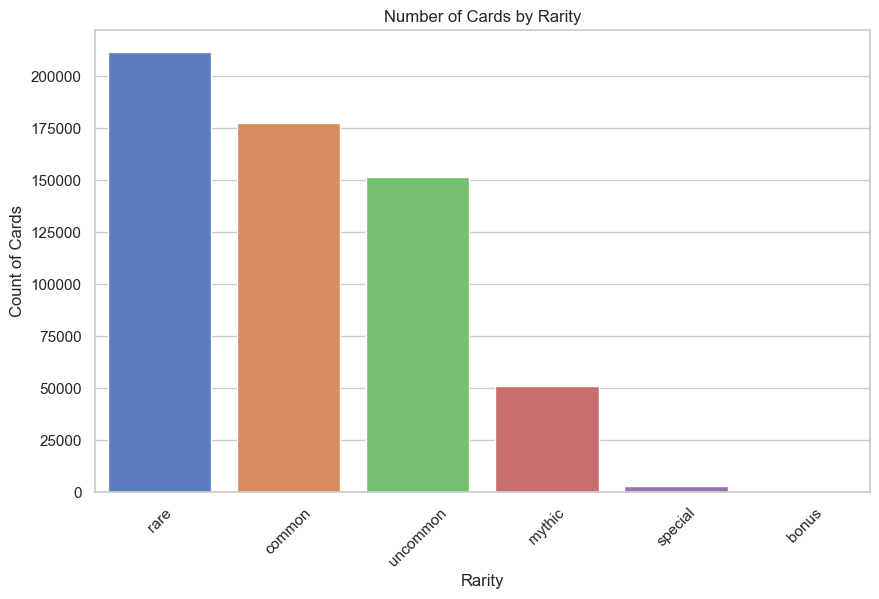

In [36]:
# Zähle die Anzahl der Karten pro Seltenheit (rarity)
rarity_counts = merged_df["rarity"].value_counts()

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(x=rarity_counts.index, y=rarity_counts.values, palette="muted")

# Achsenbeschriftungen & Titel
plt.xlabel("Rarity")
plt.ylabel("Count of Cards")
plt.title("Number of Cards by Rarity")
plt.xticks(rotation=45)  # Falls nötig, Labels drehen

plt.show()

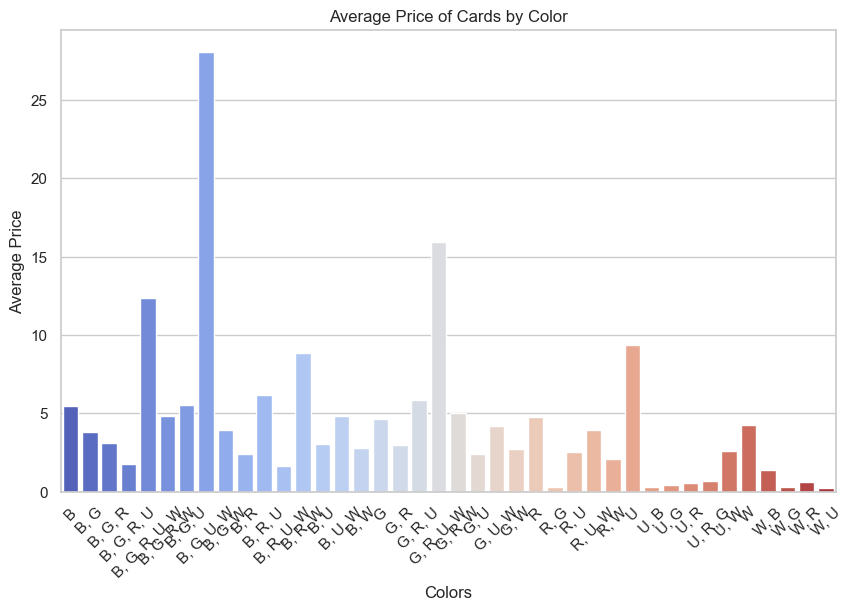

In [15]:
# Ensure price column is numeric
merged_df["price"] = pd.to_numeric(merged_df["price"], errors="coerce")

# If colors are stored as lists, explode them
merged_df_exploded = merged_df.explode("colors")

# Calculate the average price per color
avg_price_per_color = merged_df_exploded.groupby("colors")["price"].mean().dropna()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_color.index, y=avg_price_per_color.values, palette="coolwarm")

# Customize plot
plt.xlabel("Colors")
plt.ylabel("Average Price")
plt.title("Average Price of Cards by Color")
plt.xticks(rotation=45)
plt.show()

Looks like the rds are Rare followed by common and uncommon, this suprised me since rare is the middle rarity and it still hast the molst cards, which might explain the costs since its rising <br>
also the most common color combination seems to be B,G,U which i need to keep in mind that there are combined color carts for the later Machine learning so it doesnt just print ouit the first value

# Question 2
Does it matter when the cards came out does it increase prices?
are there multiple versions on different years i need to prepare the data for (no there are no duplicates this is dealt with)

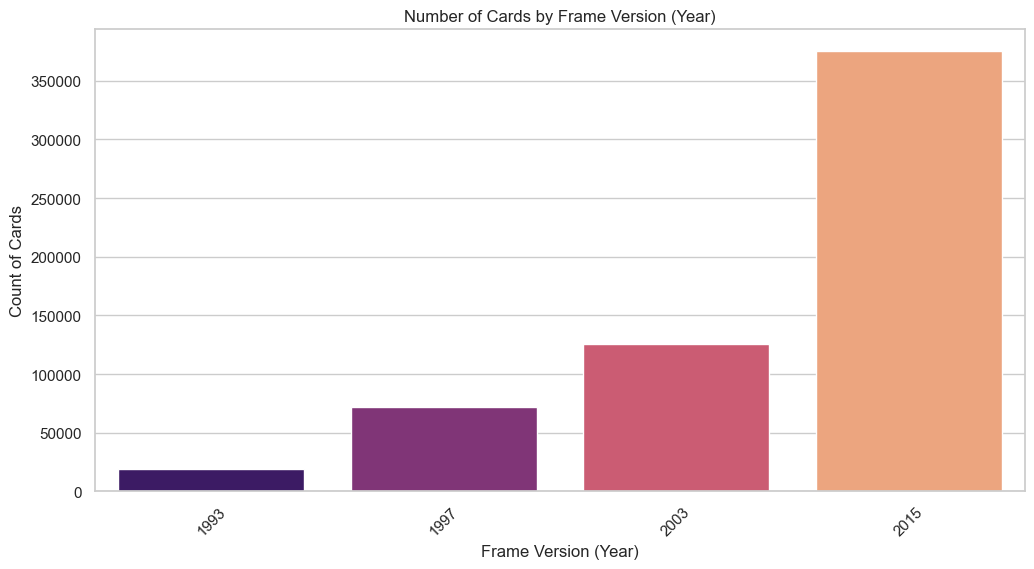

In [16]:
# Convert frameVersion to numeric (force errors to NaN)
merged_df["frameVersion"] = pd.to_numeric(merged_df["frameVersion"], errors="coerce")

# Drop NaN values (if there are invalid years)
merged_df_cleaned = merged_df.dropna(subset=["frameVersion"])

# Convert to integer (optional, if all values are now valid years)
merged_df_cleaned["frameVersion"] = merged_df_cleaned["frameVersion"].astype(int)

# Count occurrences of each frameVersion (year)
frame_counts = merged_df_cleaned["frameVersion"].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=frame_counts.index, y=frame_counts.values, palette="magma")

# Customize plot
plt.xlabel("Frame Version (Year)")
plt.ylabel("Count of Cards")
plt.title("Number of Cards by Frame Version (Year)")
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

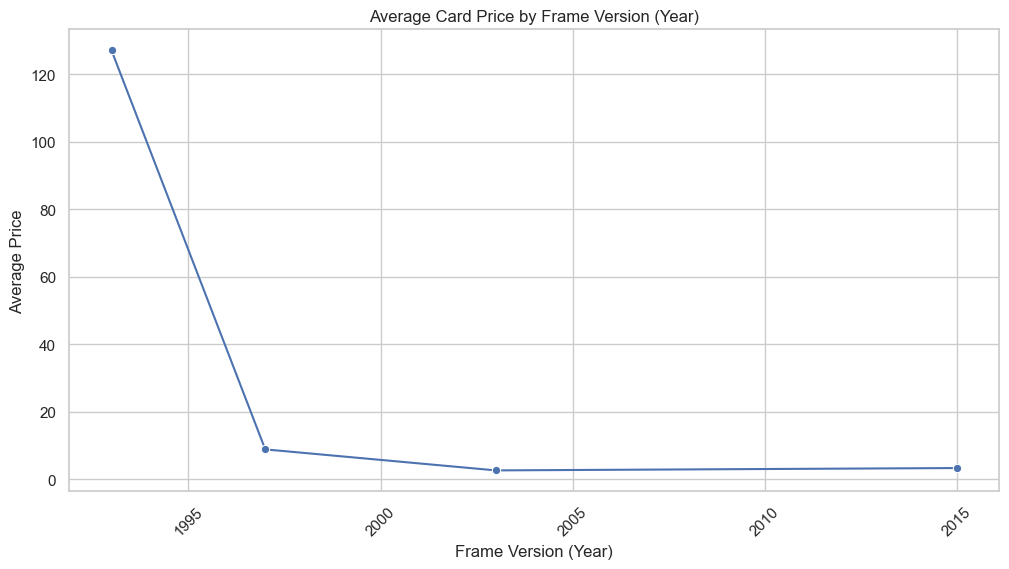

In [17]:

# Sicherstellen, dass "frameVersion" numerisch ist
merged_df["frameVersion"] = pd.to_numeric(merged_df["frameVersion"], errors="coerce")

# Sicherstellen, dass "price" numerisch ist
merged_df["price"] = pd.to_numeric(merged_df["price"], errors="coerce")

# Ungültige Werte entfernen (NaN-Werte droppen)
merged_df_cleaned = merged_df.dropna(subset=["frameVersion", "price"])

# Durchschnittspreis pro Jahr berechnen
avg_price_per_year = merged_df_cleaned.groupby("frameVersion")["price"].mean()

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values, marker="o", color="b")

# Plot anpassen
plt.xlabel("Frame Version (Year)")
plt.ylabel("Average Price")
plt.title("Average Card Price by Frame Version (Year)")
plt.xticks(rotation=45)  # Falls Jahre unleserlich sind, leicht drehen
plt.grid(True)

plt.show()

It seems older cards are more expensive, that was kinda obvious since the older the less were printed and even less are still available <br>
commonly old cards were either weak or incredible strong in comparisson to today

# Question 3
Do rarity types matter in this data set?

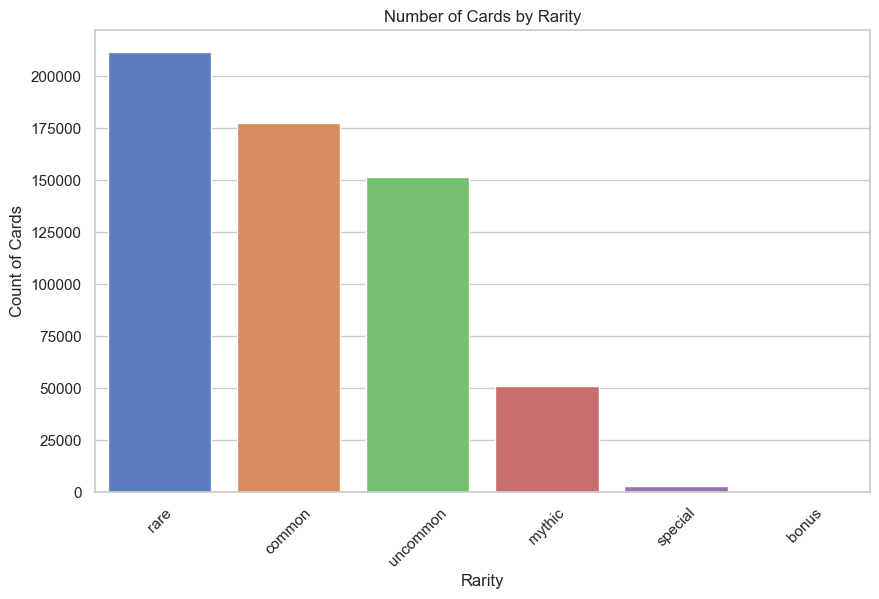

In [ ]:
# Zähle die Anzahl der Karten pro Seltenheit (rarity)
rarity_counts = merged_df["rarity"].value_counts()

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(x=rarity_counts.index, y=rarity_counts.values, palette="muted")

# Achsenbeschriftungen & Titel
plt.xlabel("Rarity")
plt.ylabel("Count of Cards")
plt.title("Number of Cards by Rarity")
plt.xticks(rotation=45)  # Falls nötig, Labels drehen

plt.show()

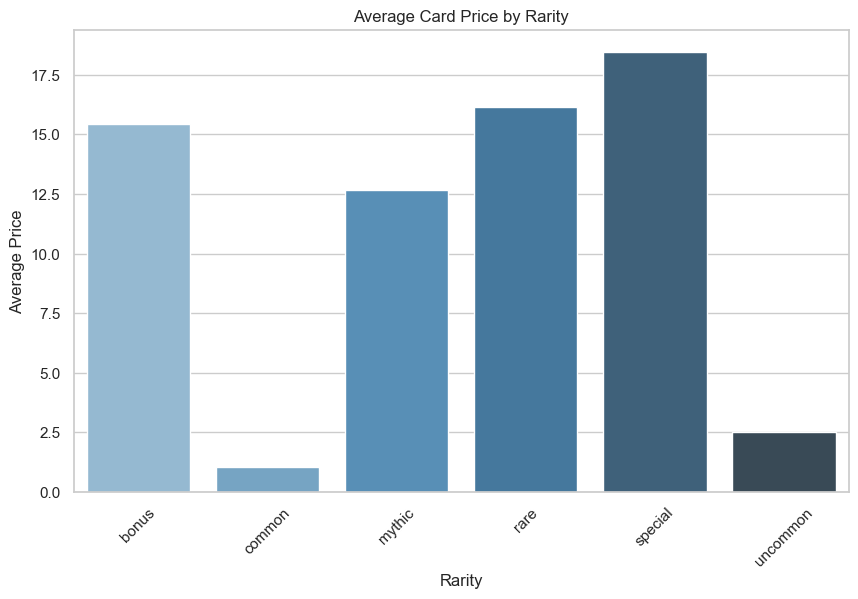

In [19]:
# Sicherstellen, dass "price" numerisch ist
merged_df["price"] = pd.to_numeric(merged_df["price"], errors="coerce")

# Ungültige Werte entfernen (NaN-Werte droppen)
merged_df_cleaned = merged_df.dropna(subset=["rarity", "price"])

# Durchschnittspreis pro Seltenheit berechnen
avg_price_per_rarity = merged_df_cleaned.groupby("rarity")["price"].mean()

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_rarity.index, y=avg_price_per_rarity.values, palette="Blues_d")

# Achsenbeschriftungen & Titel
plt.xlabel("Rarity")
plt.ylabel("Average Price")
plt.title("Average Card Price by Rarity")
plt.xticks(rotation=45)  # Falls nötig, Labels drehen

plt.show()

they definetely do so its clear the prices are based on this, i definetely have to secure the prices part is 100% accurate in my model since its an important factor that could cause damages

# 5 Evaluation – Which model best meets the business objectives?

Ive looked over everything i have and started with: <br>

## SentenceTransformer:

    Captures the meaning of sentences and handles grammar issues, mixed cases, and phrasing variations.
    Other methods like TF-IDF and Bag of Words don’t understand context, so they miss the meaning behind similar sentences.

<br><br>
I also check other algorithms like:
<br><br>
KNN Classifier<br>
Decision Trees<br>
Neural Networks<br>
<br><br>
Reasoning:<br>
    SVMs need heavy feature engineering and don’t handle the semantic meaning of sentences well. They also struggle with noisy or inconsistent input, which makes them less ideal compared to SentenceTransformer’s ability to understand context directly. <br>
    Decision Trees require structured data and work best with clear features. They wouldn’t handle sentence-level data effectively and would need additional steps to deal with unstructured text, making them less efficient for this task.<br>
    Neural Networks require a lot of data and computational power to train. They’re also prone to overfitting on smaller datasets, and they are slower during training and inference compared to SentenceTransformer + KNN, which is quicker and simpler to deploy.<br>
<br>
also i needed to think about what data types i have and not forget this, else the website could crash when a specific type of card would be called upon, for example Decision Trees rely heavily on clear, <br>
structured features. If the data consists of categorical values like "B, G, U" 
<br>


<br><br>
im still a beginner so i chose the best path to go with SentenceTransformer for easy, quick and accurate data

# Machine Learning Part

### Decision Tree

In [40]:
import pickle
import json
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.tree import DecisionTreeClassifier

# Lade das vortrainierte Sprachmodell
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Lade die Fragen und Antworten aus der JSON-Datei
with open("questions.json", "r", encoding="utf-8") as file:
    data = json.load(file)
    questions = data["questions"]
    answers = data["answers"]

print(f"Loaded {len(questions)} questions and answers.")

# Konvertiere Fragen in Satz-Embeddings
question_embeddings = sentence_model.encode(questions)

# Trainiere den Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(question_embeddings, answers)

# Speichere das trainierte Modell
with open("question_model_tree.pkl", "wb") as model_file:
    pickle.dump((sentence_model, clf), model_file)

print("Decision Tree Model has been trained and saved as 'question_model_tree.pkl'.")

# Funktion zur Vorhersage von Antworten
def predict_answer_tree(question):
    # Frage in ein Embedding umwandeln
    question_embedding = sentence_model.encode([question])
    
    # Vorhersage treffen
    predicted_answer = clf.predict(question_embedding)
    
    return predicted_answer[0]

# Beispielnutzung
user_question = "angel of mercy cost mana"
print(f"Predicted answer: {predict_answer_tree(user_question)}")


Loaded 1000 questions and answers.
Decision Tree Model has been trained and saved as 'question_model_tree.pkl'.
Predicted answer: 9


In [42]:
import pickle

# Replace 'your_model.pkl' with the path to your .pkl file
with open('question_model.pkl', 'rb') as file:
    model = pickle.load(file)
print(model)

(SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), KNeighborsClassifier(metric='cosine', n_neighbors=3))


In [56]:
user_question2 = "Whats the mana cost of angel of mercy "
print(f"Predicted answer: {(user_question2)}")

user_question2 = "cost mana angel of mercy "
print(f"Predicted answer: {(user_question2)}")

user_question3 = "price mana angel of mecy "
print(f"Predicted answer: {(user_question3)}")

Predicted answer: Whats the mana cost of angel of mercy 
Predicted answer: cost mana angel of mercy 
Predicted answer: price mana angel of mecy 


## Comment
This approach is not suited at all, the predicted value it printed out was 9, but the card has  a 5 value <br>
next approach: Linear Model

In [43]:
import pickle
import json
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression

# Lade das vortrainierte Sprachmodell
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Lade die Fragen und Antworten aus der JSON-Datei
with open("questions.json", "r", encoding="utf-8") as file:
    data = json.load(file)
    questions = data["questions"]
    answers = data["answers"]

print(f"Loaded {len(questions)} questions and answers.")

# Konvertiere Fragen in Satz-Embeddings
question_embeddings = sentence_model.encode(questions)

# Trainiere das Lineare Modell (Logistic Regression)
clf = LogisticRegression(max_iter=200)
clf.fit(question_embeddings, answers)

# Speichere das trainierte Modell
with open("question_model_logistic.pkl", "wb") as model_file:
    pickle.dump((sentence_model, clf), model_file)

print("Logistic Regression Model has been trained and saved as 'question_model_logistic.pkl'.")

# Funktion zur Vorhersage von Antworten
def predict_answer_logistic(question):
    # Frage in ein Embedding umwandeln
    question_embedding = sentence_model.encode([question])
    
    # Vorhersage treffen
    predicted_answer = clf.predict(question_embedding)
    
    return predicted_answer[0]

# Beispielnutzung
user_question = "angel of mercy cost mana"
print(f"Predicted answer: {predict_answer_logistic(user_question)}")


Loaded 1000 questions and answers.
Logistic Regression Model has been trained and saved as 'question_model_logistic.pkl'.
Predicted answer: mtgo, paper


In [45]:
import pickle

# Replace 'your_model.pkl' with the path to your .pkl file
with open('question_model.pkl', 'rb') as file:
    model = pickle.load(file)
    print(model)

(SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), KNeighborsClassifier(metric='cosine', n_neighbors=3))


In [55]:
user_question2 = "Whats the mana cost of angel of mercy "
print(f"Predicted answer: {(user_question2)}")

user_question2 = "cost mana angel of mercy "
print(f"Predicted answer: {(user_question2)}")

user_question3 = "price mana angel of mecy "
print(f"Predicted answer: {(user_question3)}")

Predicted answer: Whats the mana cost of angel of mercy 
Predicted answer: cost mana angel of mercy 
Predicted answer: price mana angel of mecy 


# Comment
This one is even worse its output is mtgo, paper which is a completely different value inside the dataset and is not remotely precise enough<br>
next approach: sentenceTransformer (final Result)

In [46]:
import pickle
import json
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import KNeighborsClassifier

# Load a pre-trained language model that understands sentence meaning
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Load the questions and answers from the JSON file
with open("questions.json", "r", encoding="utf-8") as file:
    data = json.load(file)
    questions = data["questions"]
    answers = data["answers"]

print(f"Loaded {len(questions)} questions and answers.")

# Convert questions into sentence embeddings
question_embeddings = sentence_model.encode(questions)

# Train a KNN classifier on the embeddings
clf = KNeighborsClassifier(n_neighbors=3, metric="cosine")
clf.fit(question_embeddings, answers)

# Save the trained model
with open("question_model.pkl", "wb") as model_file:
    pickle.dump((sentence_model, clf), model_file)

print("Model has been trained and saved as 'question_model.pkl'.")

# Function to predict answers
def predict_answer(question):
    # Convert the input question to an embedding
    question_embedding = sentence_model.encode([question])
    
    # Get the closest match
    distances, indices = clf.kneighbors(question_embedding, n_neighbors=1)
    
    # If the best match is too far, return a fallback response
    if distances[0][0] > 0.5:  # Adjust threshold as needed
        return "I don't know this yet."
    
    return answers[indices[0][0]]

# Example usage
user_question = "angel of mercy cost mana"
print(f"Predicted answer: {predict_answer(user_question)}")


Loaded 1000 questions and answers.
Model has been trained and saved as 'question_model.pkl'.
Predicted answer: 5.0


In [38]:
import pickle

# Replace 'your_model.pkl' with the path to your .pkl file
with open('question_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [57]:
user_question2 = "Whats the mana cost of angel of mercy "
print(f"Predicted answer: {(user_question2)}")

user_question2 = "cost mana angel of mercy "
print(f"Predicted answer: {(user_question2)}")

user_question3 = "price mana angel of mecy "
print(f"Predicted answer: {(user_question3)}")

Predicted answer: Whats the mana cost of angel of mercy 
Predicted answer: cost mana angel of mercy 
Predicted answer: price mana angel of mecy 


#Comment
Thats the exact answer i was wanting to get, i also tested it with additional questions and it seemed fine <br>
my next step is to limittest it now withj bad grammar or changing the sentence


In [54]:
user_question2 = "cost mana angel of mercy "
print(f"Predicted answer: {predict_answer(user_question2)}")

Predicted answer: 5.0


In [49]:
user_question2 = "price mana angel of mercy "
print(f"Predicted answer: {predict_answer(user_question2)}")

Predicted answer: 5.0


In [50]:
user_question2 = "price mana angel of mecy "
print(f"Predicted answer: {predict_answer(user_question2)}")

Predicted answer: I don't know this yet.


# Comment
This was important for me, rather than false information if the card is really not found its saying "i dont know this yet" instead of fooling the user <br>
but i want to try makeing the ML Programm trying to improvise if it doesnt know something (i will put a desclaimer tho to not cause damages)

In [51]:
import pickle
import json
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import KNeighborsClassifier

# Load a pre-trained language model that understands sentence meaning
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Load the questions and answers from the JSON file
with open("questions.json", "r", encoding="utf-8") as file:
    data = json.load(file)
    questions = data["questions"]
    answers = data["answers"]

print(f"Loaded {len(questions)} questions and answers.")

# Convert questions into sentence embeddings
question_embeddings = sentence_model.encode(questions)

# Train a KNN classifier on the embeddings
clf = KNeighborsClassifier(n_neighbors=3, metric="cosine")
clf.fit(question_embeddings, answers)

# Save the trained model
with open("question_model.pkl", "wb") as model_file:
    pickle.dump((sentence_model, clf), model_file)

print("Model has been trained and saved as 'question_model.pkl'.")

# Function to predict answers
def predict_answer(question):
    # Convert the input question to an embedding
    question_embedding = sentence_model.encode([question])
    
    # Get the closest match
    distances, indices = clf.kneighbors(question_embedding, n_neighbors=3)
    
    # If the best match is too far, return a fallback response
    if distances[0][0] > 0.5:  # Adjust threshold as needed
        # Try to improvise by checking the next best matches
        improvise_answer = "I'm not entirely sure, but here's something related:"
        related_answers = [answers[i] for i in indices[0]]
        improvise_answer += " " + ", ".join(related_answers)
        return improvise_answer
    
    return answers[indices[0][0]]

# Example usage
user_question = "angel of mercy cost mana"
print(f"Predicted answer: {predict_answer(user_question)}")


Loaded 1000 questions and answers.
Model has been trained and saved as 'question_model.pkl'.
Predicted answer: 5.0


In [52]:
user_question2 = "price mana angel of mecy "
print(f"Predicted answer: {predict_answer(user_question2)}")

Predicted answer: I'm not entirely sure, but here's something related: 5.0, 5.0, 3.0


Toghether with this disclaimer i can actually make this card do predictions, since the cards often have similar names its hard, there are propably hundreds of angels of "ABC" <br>
but i will go with this Version for now
